
<div class= 'alert alert-info alert-block' align='center'>
    <h1><b>Heart Disease Prediction</b></h1>
</div>

<div align='center'>
    <h5><b>By using Logistic Regression Model</b></h5>
</div>


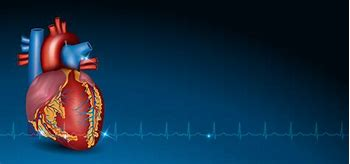

In [149]:
Image(r"C:\Users\shubh\Desktop\python\upgrad\Images\heart.jpg",width=1200)

## Problem Statement:
****
****
One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.

## Data Description:
****
****
- age: Age of the patient in years.
- gender: Gender of the patient.
- cp: Chest pain type.
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
- chol: Serum cholesterol in mg/dl.
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- restecg: Resting electrocardiographic results.
- thalach: Maximum heart rate achieved.
- exang: Exercise induced angina (1 = yes; 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment.
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.
- heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).

## Task 
****
****
Predict whether patient has heart disease or not

In [11]:
# Importing libaries
import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for data modelling
from sklearn.model_selection import train_test_split , GridSearchCV , KFold ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score ,confusion_matrix , ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

In [12]:
# Loading dataset 

df = pd.read_csv(r"heart_disease.csv")
# fetching top 5 rows 
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
# number of rows and columns in data
df.shape

(303, 14)

In [17]:
# getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [19]:
# checking the null values 
(df.isnull().sum()/len(df)) *100

age                0.000000
gender             0.000000
cp                 0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalach            0.000000
exang              0.000000
oldpeak            0.000000
slope              0.000000
ca                 1.320132
thal               0.660066
heart_diagnosis    0.000000
dtype: float64

In [21]:
# filling the null values by using mode 

df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [23]:
# checking for null records
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [25]:
# checking for duplicates result 
df.duplicated().sum()

0

##### There are no null or duplicates records in the data

<div class='alert alert-info alert-block' align='center'>
    <h3>Exploratory Data Analysis</h3>
</div>

In [29]:
# descriptive statistics information about data
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.0,9.0,29.0,48.0,56.0,61.0,77.0
gender,303.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.0,1.0,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,132.0,18.0,94.0,120.0,130.0,140.0,200.0
chol,303.0,247.0,52.0,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
restecg,303.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
thalach,303.0,150.0,23.0,71.0,134.0,153.0,166.0,202.0
exang,303.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.0,1.0,0.0,0.0,1.0,2.0,6.0


In [31]:
# uniques values for columns

for col in df.columns:
    print(f"Column_Name : {col}\nUnique records count : {df[col].nunique()}")
    print(df[col].unique())
    print('\n***********************\n')

Column_Name : age
Unique records count : 41
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

***********************

Column_Name : gender
Unique records count : 2
[1. 0.]

***********************

Column_Name : cp
Unique records count : 4
[1. 4. 3. 2.]

***********************

Column_Name : trestbps
Unique records count : 50
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

***********************

Column_Name : chol
Unique records count : 152
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 

In [33]:
# Diagnosis of heart disease (angiographic disease status) => (0 = No heart disease, >0 = heart disease)
df['heart_diagnosis'] = df['heart_diagnosis'].apply(lambda x : 0 if x==0 else 1)

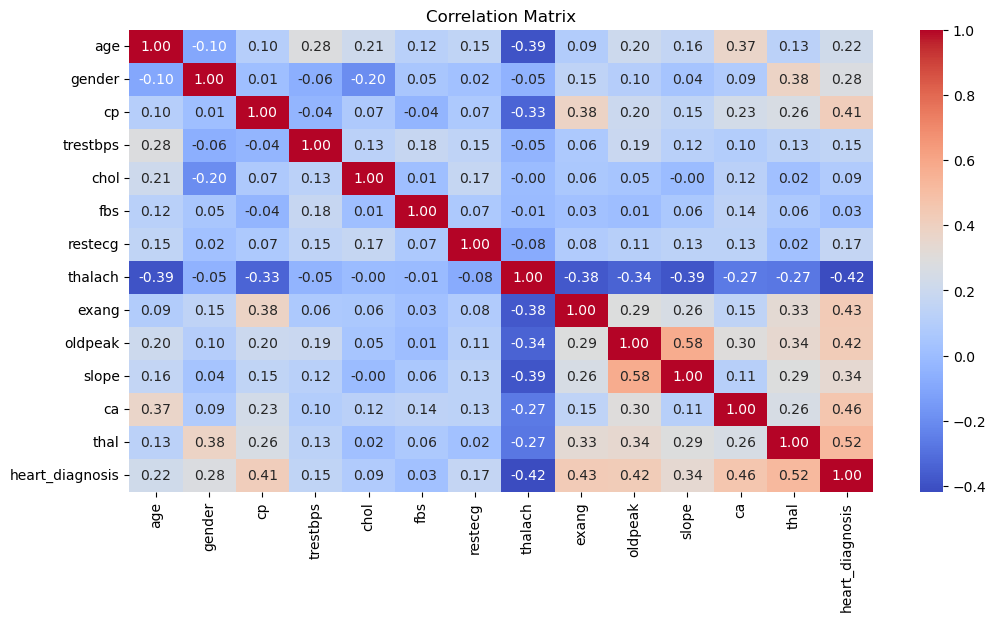

In [35]:
# correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

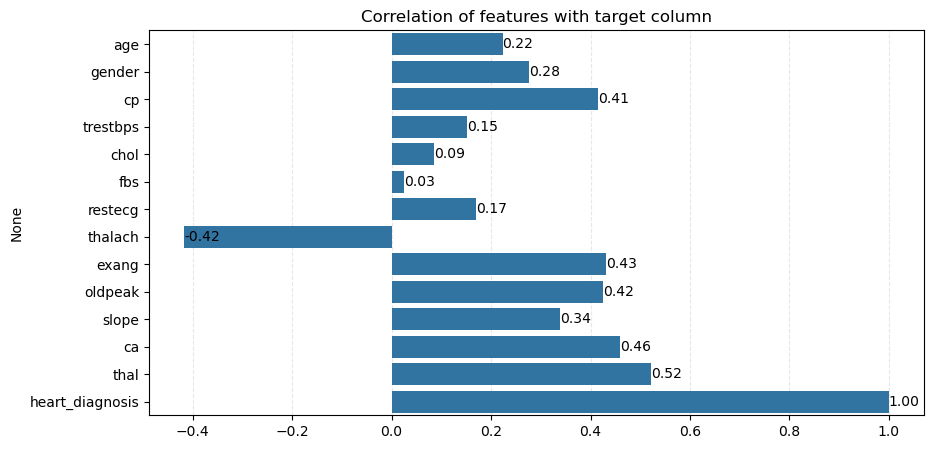

In [37]:
# plotting the corelation of features with the target column

plt.figure(figsize=(10,5))
corr = df.corr()['heart_diagnosis']
ax = sns.barplot(y = corr.keys() , x = corr.values,zorder=3)

for p in ax.patches:
    plt.text(
        p.get_width(),
        p.get_y() + p.get_height()/2,
        f'{p.get_width():.2f}',
        ha='left',
        va='center'
    )

plt.title('Correlation of features with target column')
plt.grid(axis='x',alpha=0.3,zorder=0,linestyle='--')
plt.show()

The following columns show a strong positive or negative relationship with the target variable, suggesting they are significant predictors of heart disease: **cp, thalach , oldpeak , ca , thal ,exang**

These features show a moderate correlation with the target variable, indicating they might still have an impact but are less influential than the strongly related features: **trestbps , restecg ,slope**

The following features show weak correlations, implying they might have a minimal effect on predicting heart disease: **chol , fbs**

In [40]:
print('Total no records :',len(df),'\n')
print(df['heart_diagnosis'].value_counts())

Total no records : 303 

heart_diagnosis
0    164
1    139
Name: count, dtype: int64


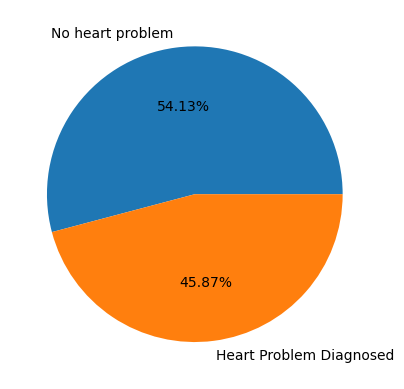

In [42]:
# creating visuals for Diagnosed and Not Diagnosed patient percentage
value_count = df['heart_diagnosis'].value_counts(normalize=True)
plt.pie(value_count.values,autopct='%0.2f%%',labels =['No heart problem','Heart Problem Diagnosed'])

plt.show()

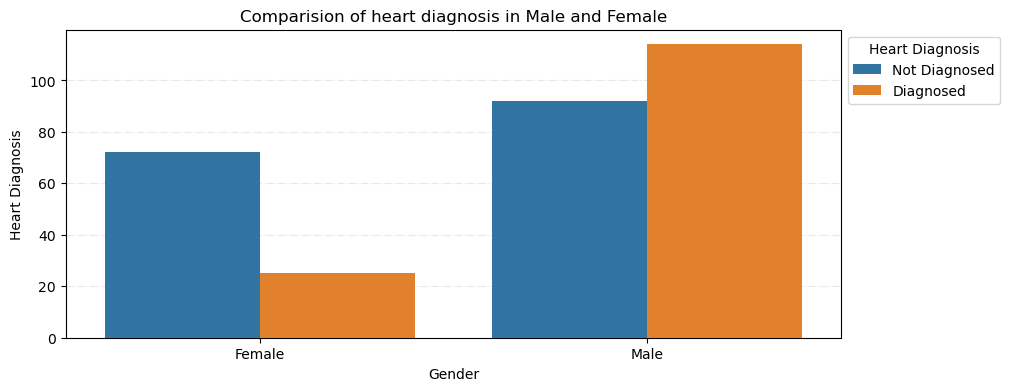

In [44]:
# Creating visualization for heart diagnosis in Male and Female
plt.figure(figsize=(10,4))

sns.countplot(x = df['gender'] ,hue=df['heart_diagnosis'],zorder=3)

plt.title('Comparision of heart diagnosis in Male and Female')
plt.xlabel('Gender')
plt.ylabel('Heart Diagnosis')
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.legend(title='Heart Diagnosis',labels=['Not Diagnosed','Diagnosed'],bbox_to_anchor=(1,1))
plt.grid(axis = 'y',linestyle='-.',alpha=0.3,zorder=0)

plt.show()

**As seen from the above graph, the diagnosis of heart problems is more prevalent in males compared to females. This suggests that gender might be an important factor contributing to the likelihood of heart disease, with males showing a higher incidence of the condition.**

In [47]:
Not_diagnosed = df.query("heart_diagnosis==0")
Diagnosed = df.query("heart_diagnosis==1")

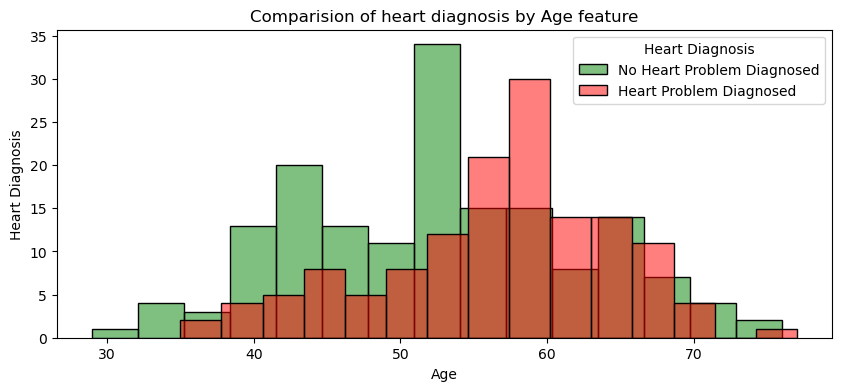

In [49]:
# Creating visualization for heart diagnosis in Male and Female
plt.figure(figsize=(10,4))


sns.histplot(x = Not_diagnosed['age'], color='green',alpha=0.5,label='No Heart Problem Diagnosed',bins=15)
sns.histplot(x = Diagnosed['age'] ,color='red',alpha=0.5,label='Heart Problem Diagnosed',bins=15)

plt.title('Comparision of heart diagnosis by Age feature')
plt.xlabel('Age')
plt.ylabel('Heart Diagnosis')
plt.legend(title='Heart Diagnosis',bbox_to_anchor=(1,1))

plt.show()

**As seen from the graph, the likelihood of heart problems increases as age increases. The highest probability of a heart condition appears to occur around the age range of 55-60 years, with a noticeable rise in the incidence of heart problems as individuals reach middle age.**

In [51]:
columns = df.columns
print(columns)

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_diagnosis'],
      dtype='object')


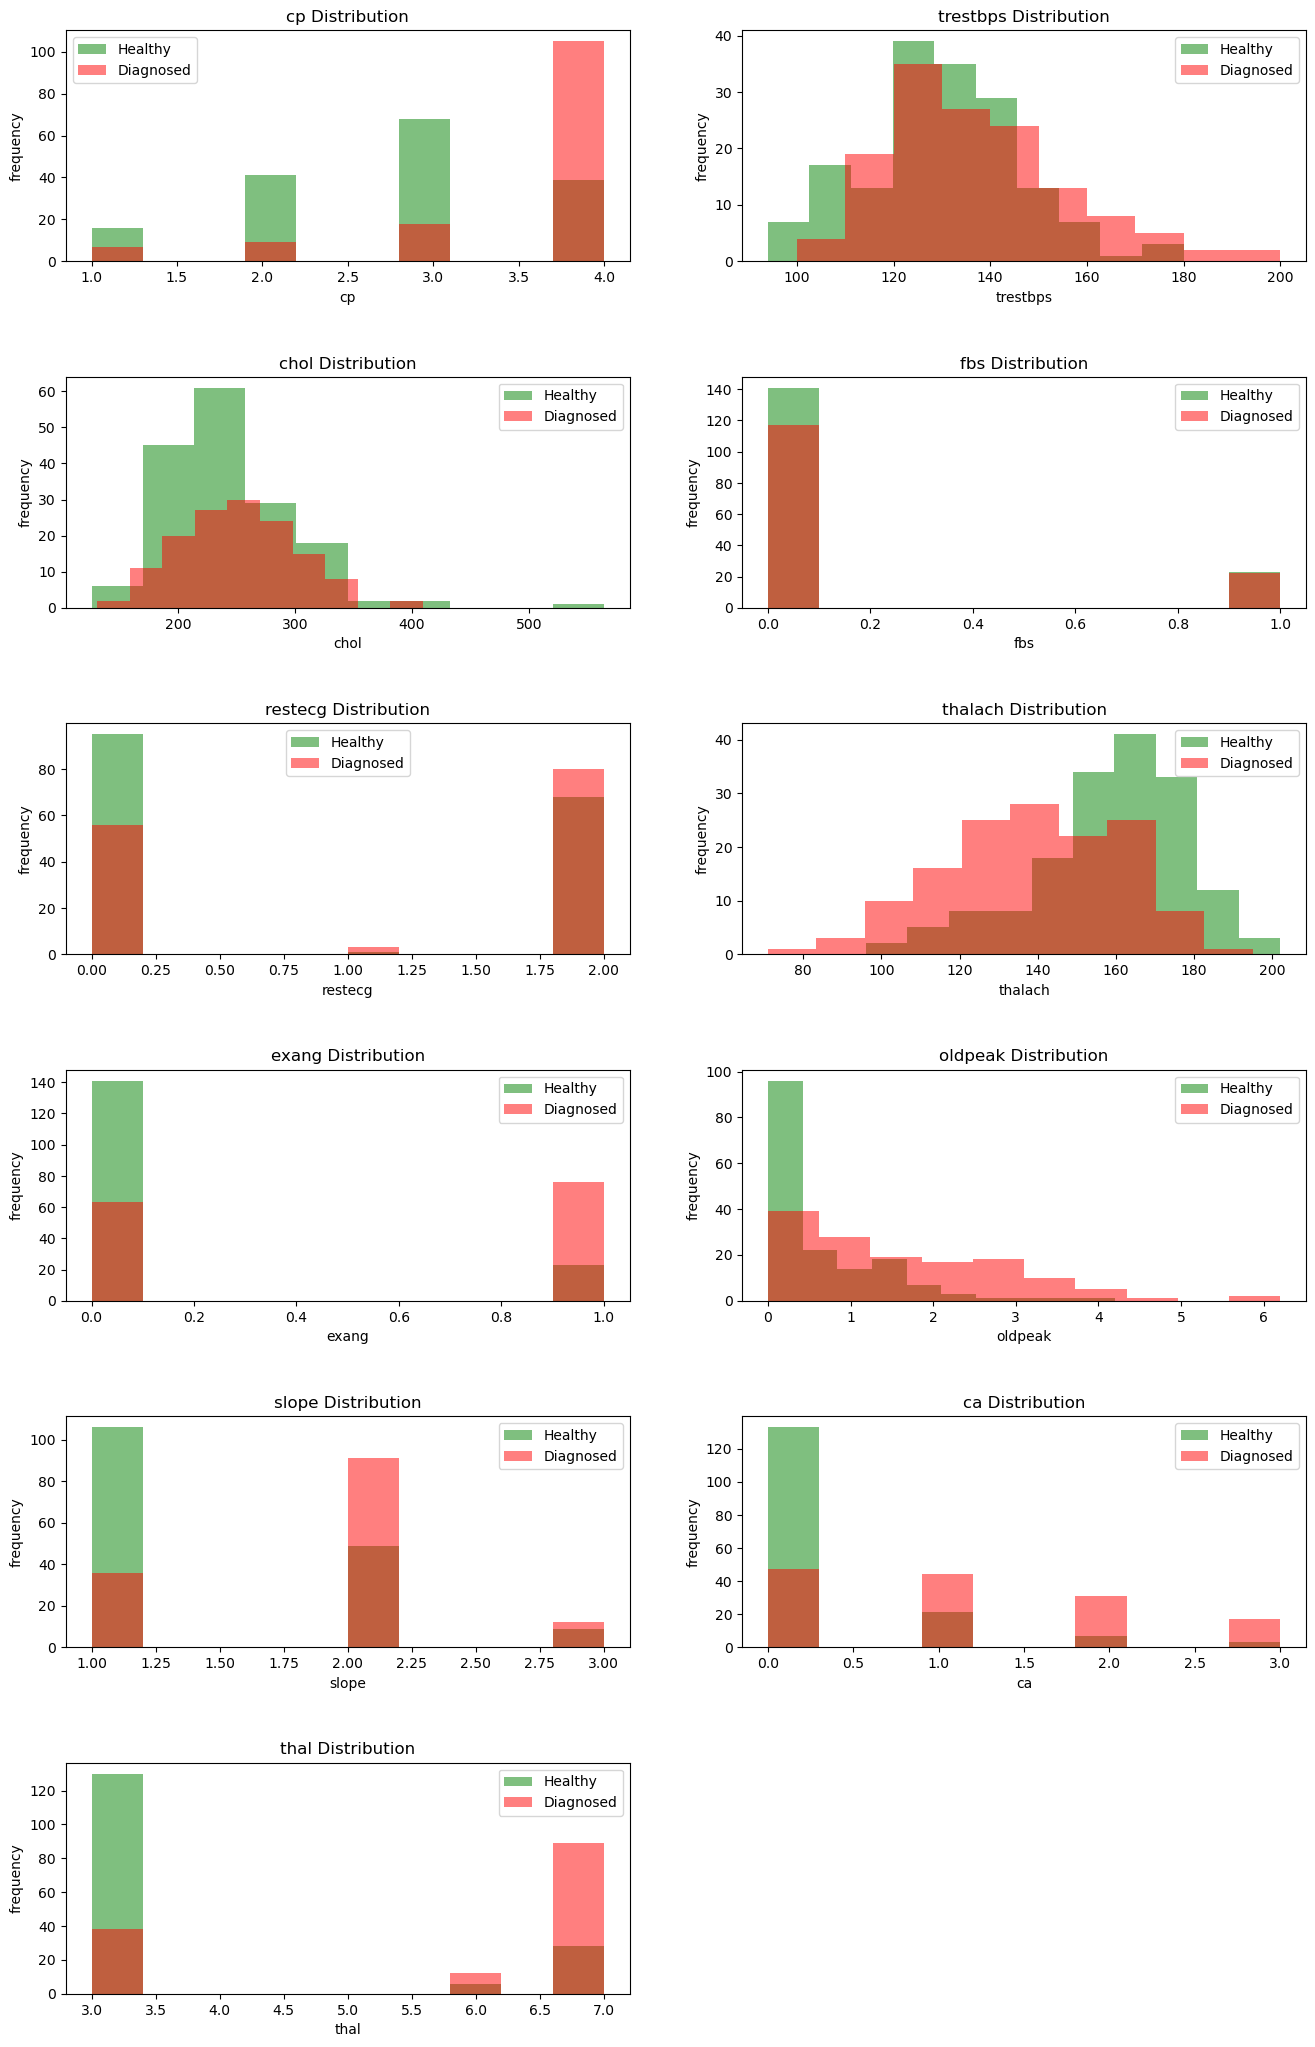

In [71]:
# List of columns for which histogram will be plot
columns = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

# define the number of rows and columns for subplots
cols = df.shape[1]
rows = (cols-1)//2 +1

# create subplots
fig ,axes = plt.subplots(nrows=rows,ncols=2,figsize=(16,30))
fig.subplots_adjust(hspace=0.5)

# flatten the axes array for easier iteration
axes = axes.flatten()

# running loop to plot histogram for different columns
for i , col in enumerate(columns):
    ax = axes[i]
    ax.set_title(f'{col} Distribution')
    ax.hist(Not_diagnosed[col] ,color='green',label='Healthy',alpha=0.5)
    ax.hist(Diagnosed[col],color='red',label='Diagnosed',alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('frequency')
    ax.legend()
# removing unused subplots
for i in range(len(columns) , len(axes)):
    fig.delaxes(axes[i])

plt.show()

<div class='alert alert-info alert-block' align='center'><h3>Model Traning and Testing</h3></div>

In [80]:
# creating variables 
lr_reg = LogisticRegression()

scaler = StandardScaler()

In [82]:
# features columns
X=df.drop('heart_diagnosis',axis=1)

# target columns
y=df['heart_diagnosis']

### Scaling the data

In [85]:
# scaling the columns
columns_to_scale = ['age','trestbps','chol','thalach']

# fitting and transforming the columns_to_scale
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,2.3,3.0,0.0,6.0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,1.5,2.0,3.0,3.0
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,2.6,2.0,2.0,7.0
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,3.5,3.0,0.0,3.0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,1.4,1.0,0.0,3.0


### Splitting data for train and test

In [88]:
# splitting the data for training and testing
X_train , X_test , y_train ,  y_test = train_test_split(X , y , test_size=0.2,random_state=23)

# shape of the train and test data
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (242, 13)
y_train shape : (242,)
X_test shape : (61, 13)
y_test shape : (61,)


### Training the data

In [91]:
# fitting the model
model = lr_reg.fit(X_train,y_train)

# predicting the model on train data
y_pred_train = model.predict(X_train)

# checking the accuracy for train data
print('Accuracy_score for Train data',accuracy_score(y_train , y_pred_train))
print('Precision_score for Train data',precision_score(y_train , y_pred_train))

Accuracy_score for Train data 0.8636363636363636
Precision_score for Train data 0.8823529411764706


### Testing the data

In [94]:
# testing on test data
y_pred_test = model.predict(X_test)

# checking the accuracy for train data
print('Accuracy_score for Test data',accuracy_score(y_test , y_pred_test))
print('Precision_score for Test data',precision_score(y_test , y_pred_test))

Accuracy_score for Test data 0.8360655737704918
Precision_score for Test data 0.8214285714285714


<div class ='alert alert-info alert-block' align='center'>
    <h3><b>Hypertuning the model</b></h3>
</div>


In [97]:
# parameter for LogisticRegression hypertuning 
params = {
    'penalty':['l1','l2','elasticnet', None],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 200, 500,1000,10000],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced']
}

In [99]:
# perform grid search to get the best parameters
grid_search = GridSearchCV(lr_reg , param_grid=params , cv=KFold(5),scoring='accuracy')

# fitting the model with train data
best_model = grid_search.fit(X_train , y_train)

# checking accuracy for best model
y_pred = best_model.predict(X_test)
print('accuracy_score for best model :' ,accuracy_score(y_test , y_pred))

# Best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Best score achieved
print("Best Score: ", grid_search.best_score_)

accuracy_score for best model : 0.819672131147541
Best Parameters:  {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.8388605442176871


In [101]:
# tuned model with hypertunned parameters
tuned_model = grid_search.best_estimator_

### Cross validation score

In [106]:
val_score = cross_val_score(best_model , X , y , cv=3).mean()
print('Cross val score is : ',val_score)

Cross val score is :  0.821782178217822


### Predicting using tunned model

In [109]:
# prediction using tuned model 
model = tuned_model.fit(X_train , y_train)

y_pred = model.predict(X_test)

print('accuracy_score:' ,accuracy_score(y_test , y_pred))

accuracy_score: 0.819672131147541


### Confusion Matrix

In [112]:
confusion_matrix(y_test,y_pred)

array([[27,  6],
       [ 5, 23]], dtype=int64)

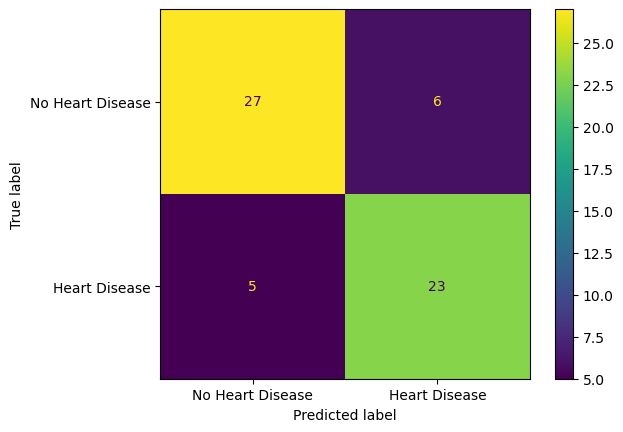

In [113]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with labels
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease']).plot(cmap='viridis')
plt.show()

### Relationship b/w feature and target columns

In [117]:
# relationship between each feature and the target variable.
coeff = lr_reg.coef_.flatten()
coeff

array([-0.19720326,  1.0610861 ,  0.59547679,  0.52359493,  0.37039197,
       -0.34406388,  0.14691103, -0.48425195,  0.88785035,  0.40707778,
        0.4831791 ,  1.18323499,  0.35999491])

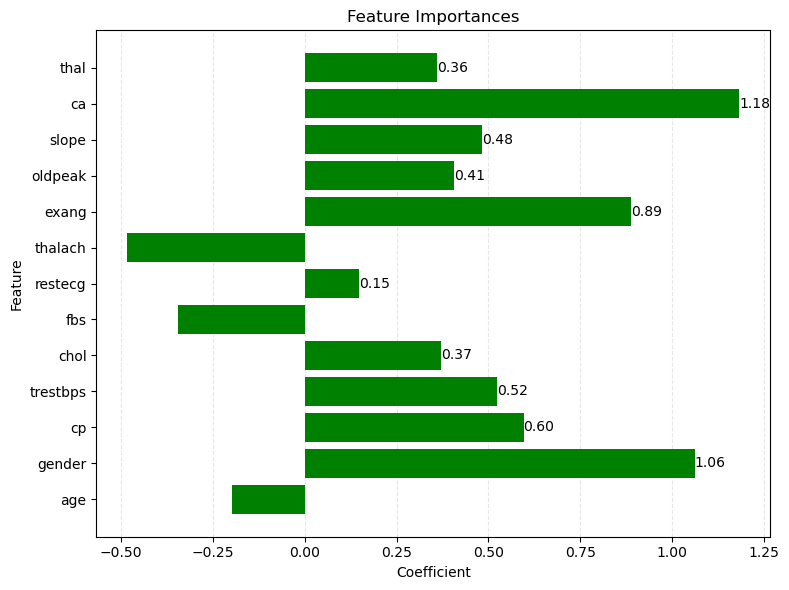

In [119]:
# plotting the relationship of each feature with the target variable.
plt.figure(figsize=(8,6))
ax = plt.barh(range(len(coeff)), coeff, align='center', color='green',zorder=4)

for p in ax.patches:
    plt.text(
        p.get_width(),
        p.get_y() + p.get_height()/2,
        f'{p.get_width():.2f}',
        ha='left',
        va='center'
    )

plt.yticks(range(len(coeff)), X.columns)
plt.title("Feature Importances")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.grid(axis='x',linestyle='--',alpha=0.3,zorder=0)
plt.tight_layout()
plt.show()

Positive coefficients indicate a positive relationship between the feature and the target variable. As the feature's value increases, the likelihood of the positive class increases.

Negative coefficients indicate a negative relationship. As the feature's value increases, the likelihood of the positive class decreases.


Strongest predictor of target are **ca ,exang, and gender** features indicating significant contribution to the diagnosis

**thalach , fbs** features has moderate negative influence.

**restcg , age** contribute lowest to the diagnosis

#### Update score card

In [131]:
score_card = pd.DataFrame(columns=['Data Type' , 'Accuracy Score','Precision Score'])

def update_score_card(score_card,Data_type ,pred_data,y_test , model):

    y_pred = model.predict(pred_data)
    metrics ={
        'Data Type':Data_type,
        'Accuracy Score':accuracy_score(y_test,y_pred),
        'Precision Score':precision_score(y_test,y_pred)
    }
    metrics_df = pd.DataFrame([metrics])
    score_card = pd.concat([score_card,metrics_df],ignore_index=True)
    return score_card

In [133]:
score_card = update_score_card(score_card , 'Train data' , X_train , y_train,model)

In [135]:
score_card = update_score_card(score_card , 'Test data' , X_test , y_test,model)

In [137]:
score_card = update_score_card(score_card , 'Test data(Tunned Model)' , X_test , y_test,tuned_model)

In [139]:
score_card

,Data Type,Accuracy Score,Precision Score
0,Train data,0.855372,0.858491
1,Test data,0.819672,0.793103
2,Test data(Tunned Model),0.819672,0.793103


<div class='alert alert-info alert-block' align='center'><h5>Conclusion</h5></div>

We are observing the same accuracy and precision scores for the test data before and after hyperparameter tuning. One of the major reasons for this may be the small size of the dataset, which contains only 303 records.